In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
from illustris_frb import simulation, frb_simulation
from illustris_frb.utils import index_to_coord, unit_sphere
import time

In [4]:
sim = simulation('L205n2500TNG')
datapath = '/home/tnguser/frb_project/data/DM_redshift'
figpath = '/home/tnguser/frb_project/figures'

In [14]:
def frb_sphere(z, origin, N=100):
    r = sim.comoving_distance(z)
    frb_locs = origin + r * unit_sphere(N)

Starting from a void

In [5]:
map_z0 = np.load(sim.get_map_path(99))
min_coord = index_to_coord(map_z0.argmin(), sim.n_bins)
min_coord

array([50, 70, 23])

In [6]:
origin = sim.binsize * min_coord
sim = frb_simulation('L205n2500TNG', origin=origin)

In [15]:
zs = (0.1, 0.3, 0.5)

In [11]:
start = time.time()
res = []
for z in zs:
    print(f'{time.time()-start:<6.2f}: z = {z}')
    outf = os.path.join(datapath, f'frbs_z{z}.txt')
    if os.path.isfile(outf):
        continue
    frb_DMs = []
    for i, frb in enumerate(frb_sphere(z, origin)):
        if sim.check_goodness(frb):
            print(f'{time.time()-start:<6.2f}: FRB {i} at {frb}')
            frb_DMs.append(sim.get_frb_DM(frb).value)
    frb_DMs = np.array(frb_DMs)
    np.savetxt(outf, frb_DMs)
    res.append(frb_DMs)

0.00  : z = 0.1
0.00  : FRB 0 at [-46702.52846723 317390.06538484 -16815.91146885]
4.40  : FRB 1 at [299116.77786718 -48417.13313502  71406.31394274]
7.75  : FRB 2 at [-219311.09501049  -45537.16506118 -128189.10608076]
10.90 : FRB 3 at [-28031.62245172 -56260.46855237 284531.80466513]
13.85 : FRB 4 at [316289.21537159  34154.49494259  40432.17220258]
16.25 : FRB 5 at [ -41643.19639999  174696.12601528 -236956.97657517]
18.72 : FRB 6 at [-186416.66632993   78445.02798819  209244.06489197]
21.16 : FRB 7 at [-49135.89777739 317167.78589195  35424.91848535]
23.97 : FRB 8 at [214907.7241032  -64837.11152111 210635.1298692 ]
26.07 : FRB 9 at [271699.6938176   29349.67328677 168962.78080008]
28.67 : FRB 10 at [294842.69042485 -70873.59967049  52278.61910428]
31.23 : FRB 11 at [ -42150.2085048  -132761.68876274 -218791.24547015]
33.63 : FRB 12 at [280890.03870826 -87115.94475306  84267.9640083 ]
36.01 : FRB 13 at [262359.5317249  204605.10719332  35619.55165913]
38.59 : FRB 14 at [ 116390.303

In [5]:
zs = (0.1, 0.3, 0.5)
frb_DMs = []
for z in zs:
    frb_DMs.append(np.loadtxt(os.path.join(datapath, f'frbs_z{z}.txt')))

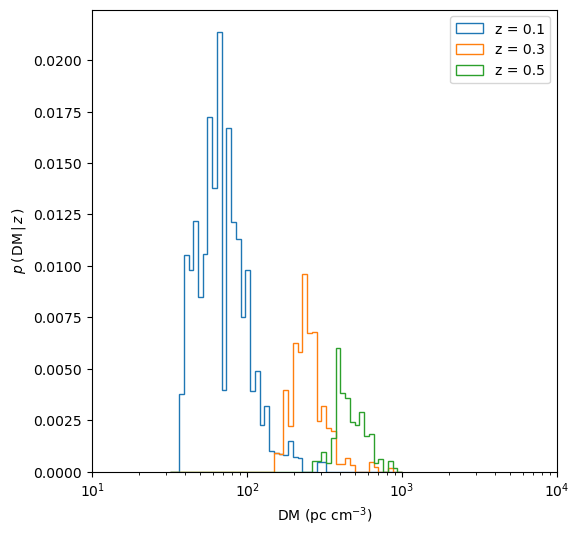

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
bins = np.logspace(1.5, 3, 50)

for z, DMs in zip(zs, frb_DMs):
    _ = ax.hist(DMs, bins=bins, histtype='step', label=f'z = {z}', density=True)
ax.set_xlabel(r'DM (pc cm$^{-3}$)')
ax.set_xlim((10, 1e4))
ax.set_xscale('log')
ax.set_ylabel(r'$p\,(\,\mathrm{DM}\,|\,z\,)$')
plt.legend()

fig.savefig(os.path.join(figpath, 'dm_z_verify_logscale.png'), dpi=200, bbox_inches='tight')

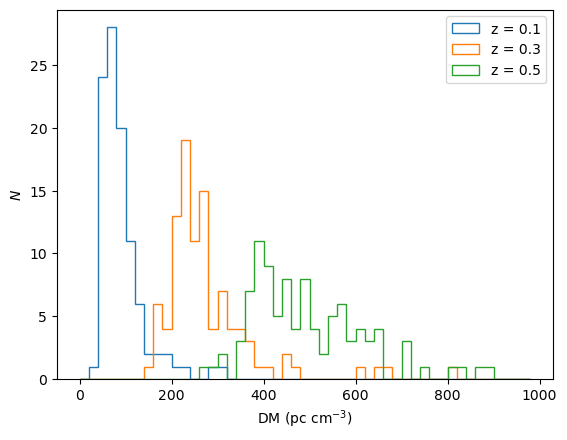

In [7]:
fig, ax = plt.subplots()
bins = np.arange(0, 1000, 20)

for z, DMs in zip(zs, frb_DMs):
    _ = ax.hist(DMs, bins=bins, histtype='step', label=f'z = {z}')
ax.set_xlabel(r'DM (pc cm$^{-3}$)')
ax.set_ylabel(r'$N$')
plt.legend()

fig.savefig(os.path.join(figpath, 'dm_z_verify.png'), dpi=200)